
# Global YouTube Statistics Analysis

This notebook contains the analysis of the Global YouTube Statistics dataset. 
The analysis includes Pearson's Correlation for numerical features and Chi-Square Test for categorical features, 
to determine their significance in relation to the target variable 'Performance rate'. Additionally, this notebook contains PCA and RFE feature Selection. Finally different machine learning models are applied. They are compared using different performance metrics such as Recall, Precision, F-Measure and Accuracy.


In [1]:
#Importing all the libraries
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/asharani/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [3]:
# Loading the dataset
file_path = 'Global YouTube Statistics_new.xlsx'  # Path for file location
df = pd.read_excel(file_path)

# first few rows of the dataset
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,View Retention,Views per upload,Performance rate
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,930.612245,1.135345e+07,Average
1,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,170.896638,3.828454e+07,Low
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1012.345679,1.697723e+08,Average
3,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,930.817610,1.269994e+06,Average
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,...,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,832.562862,8.393073e+07,Average
5,8,PewDiePie,111000000,29058044447,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,29,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924,261.784184,6.161587e+06,Low
6,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,14,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,853.576038,1.835275e+08,Average
7,10,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,23,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,780.385944,1.344602e+08,Average
8,11,Zee Music Company,96700000,57856289381,Music,Zee Music Company,8548,India,IN,Music,...,12,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,598.307026,6.768401e+06,Average
9,12,WWE,96000000,77428473662,Sports,WWE,70127,United States,US,Sports,...,11,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,806.546601,1.104118e+06,Average


## Data Cleaning

In [5]:
# Filling NaN values with the mean for numerical columns and mode for categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Rechecking for NaN values in the dataset
df.isna().sum()


rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

## Statistical Tests

In [6]:

# Pearson's correlation for numerical features
pearsons_results = []
for col in numerical_columns:
    corr, p_value = pearsonr(df[col], df['Performance rate'].astype('category').cat.codes)
    pearsons_results.append({'Feature': col, 'Correlation': corr, 'P-Value': p_value})

# Chi-square test for categorical features
chi_square_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Performance rate'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({'Feature': col, 'Chi2 Statistic': chi2, 'P-Value': p})

# Converting results to dataframes
pearsons_df = pd.DataFrame(pearsons_results)
chi_square_df = pd.DataFrame(chi_square_results)

pearsons_df, chi_square_df


(                                    Feature  Correlation        P-Value
 0                                      rank     0.153717   2.392946e-06
 1                               subscribers    -0.134712   3.657948e-05
 2                               video views    -0.437324   7.270351e-45
 3                                   uploads    -0.148765   5.033983e-06
 4                          video_views_rank     0.119725   2.470608e-04
 5                              country_rank     0.052172   1.112622e-01
 6                         channel_type_rank     0.112257   5.921789e-04
 7          video_views_for_the_last_30_days    -0.197943   1.070697e-09
 8                   lowest_monthly_earnings    -0.331402   2.363496e-25
 9                  highest_monthly_earnings    -0.331004   2.716133e-25
 10                   lowest_yearly_earnings    -0.331525   2.263776e-25
 11                  highest_yearly_earnings    -0.331420   2.348493e-25
 12             subscribers_for_last_30_days    -0.

In [4]:

# Displaying the column names to check for 'View Retention'
df.columns


Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'View Retention  ', 'Views per upload', 'Performance rate'],
      dtype='object')

## Graphical Representation of Statistical Tests

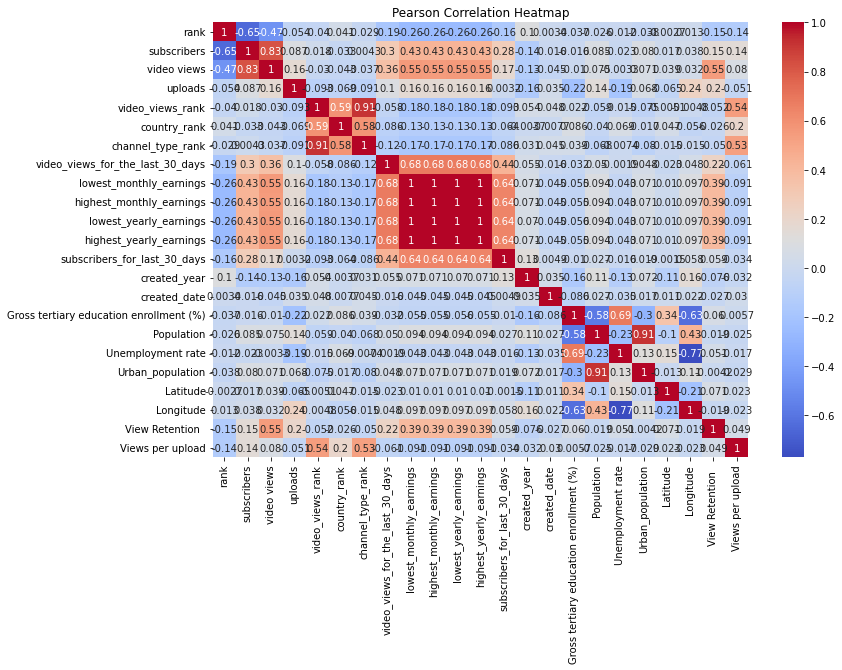

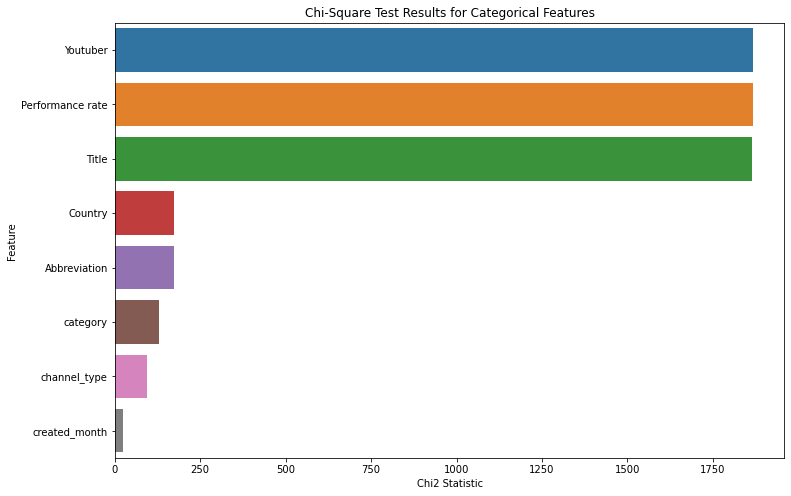

In [7]:
# Pearson's Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

# Chi-Square Test Bar Plot for Categorical Features
chi_square_df_sorted = chi_square_df.sort_values(by='Chi2 Statistic', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Chi2 Statistic', y='Feature', data=chi_square_df_sorted)
plt.title('Chi-Square Test Results for Categorical Features')
plt.show()


## Model Application and Performance Metrics

In [8]:

# Significant numerical features based on Pearson's correlation
significant_numerical_features = ['rank', 'subscribers', 'video views', 'uploads', 
                                  'video_views_rank', 'channel_type_rank', 
                                  'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 
                                  'highest_monthly_earnings', 'lowest_yearly_earnings', 
                                  'highest_yearly_earnings', 'created_year', 
                                  'created_date', 'Latitude', 'View Retention  ']

# Significant categorical features based on Chi-Square test
significant_categorical_features = ['category', 'Country', 'Abbreviation', 'channel_type']

# Encoding categorical variables
df_encoded = pd.get_dummies(df[significant_categorical_features], drop_first=True)

# Combining numerical and encoded categorical features
X = pd.concat([df[significant_numerical_features], df_encoded], axis=1)
y = df['Performance rate'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

# Models
models = {
    'KNN': KNeighborsClassifier() ,
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42)
}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print(f"{model_name} Model:")
    print(classification_report(y_test, predictions))
    print('Confusion Matrix:', confusion_matrix(y_test, predictions))
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('-------------------------------------')


KNN Model:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        62
           1       0.00      0.00      0.00         7
           2       0.91      0.85      0.88       118

    accuracy                           0.81       187
   macro avg       0.53      0.56      0.54       187
weighted avg       0.80      0.81      0.80       187

Confusion Matrix: [[ 51   1  10]
 [  7   0   0]
 [ 18   0 100]]
Accuracy: 0.8074866310160428
-------------------------------------
Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      0.71      0.83         7
           2       1.00      1.00      1.00       118

    accuracy                           0.99       187
   macro avg       0.99      0.90      0.94       187
weighted avg       0.99      0.99      0.99       187

Confusion Matrix: [[ 62   0   0]
 [  2   5   0]
 [  0   0 118]]
Accuracy: 0

/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        62
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00       118

    accuracy                           0.98       187
   macro avg       0.93      0.90      0.92       187
weighted avg       0.98      0.98      0.98       187

Confusion Matrix: [[ 61   1   0]
 [  2   5   0]
 [  0   0 118]]
Accuracy: 0.983957219251337
-------------------------------------
Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        62
           1       0.33      0.86      0.48         7
           2       0.82      0.90      0.85       118

    accuracy                           0.79       187
   macro avg       0.69      0.78      0.68       187
weighted avg       0.83      0.79      0.79       187

Confusion Matrix: [[ 36   3  23]
 [  0   6   1]
 [  3   9 106]

/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Encoding categorical variables
df_encoded_cat = pd.get_dummies(df[categorical_columns], drop_first=True)

# Combining numerical and encoded categorical features
X = pd.concat([df[numerical_columns], df_encoded_cat], axis=1)
y = df['Performance rate'].astype('category').cat.codes
#X = df[numerical_columns]
#y = df['Performance rate'].astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,created_month_Jan,created_month_Jul,created_month_Jun,created_month_Mar,created_month_May,created_month_Nov,created_month_Oct,created_month_Sep,Performance rate_High,Performance rate_Low
0,1,245000000,228000000000,20082,1,1.0,1.0,2.258000e+09,564600.0,9000000.0,...,0,0,0,1,0,0,0,0,0,0
1,3,166000000,28368841870,741,48,1.0,1.0,1.348000e+09,337000.0,5400000.0,...,0,0,0,0,0,0,0,0,0,1
2,4,162000000,164000000000,966,2,2.0,1.0,1.975000e+09,493800.0,7900000.0,...,0,0,0,0,0,0,0,1,0,0
3,5,159000000,148000000000,116536,3,2.0,2.0,1.824000e+09,455900.0,7300000.0,...,0,0,0,0,0,0,0,1,0,0
4,7,112000000,93247040539,1111,5,3.0,3.0,7.316740e+08,182900.0,2900000.0,...,0,0,0,0,1,0,0,0,0,0


## PCA Feature Selection

In [31]:
# Standardizing the features for PCA
X_scaled = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)


## RFE Feature Selection

In [32]:
# Using Decision Tree for RFE

rfe_model = RandomForestClassifier()
rfe = RFE(estimator=rfe_model, n_features_to_select=15) # Selecting top 15 features
X_rfe = rfe.fit_transform(X, y)


## Models with PCA Features

In [33]:
# Training and evaluating models with PCA features
for model_name, model in models.items():
    # Splitting the PCA-transformed data
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    # Fitting the model
    model.fit(X_train_pca, y_train_pca)
    predictions_pca = model.predict(X_test_pca)
    
    print(f"{model_name} Model with PCA Features:")
    print(classification_report(y_test_pca, predictions_pca))
    print('Confusion Matrix:', confusion_matrix(y_test_pca, predictions_pca))
    print('Accuracy:', accuracy_score(y_test_pca, predictions_pca))
    print('-------------------------------------')


KNN Model with PCA Features:
              precision    recall  f1-score   support

           0       0.80      0.19      0.31        62
           1       0.00      0.00      0.00         7
           2       0.67      0.98      0.80       118

    accuracy                           0.68       187
   macro avg       0.49      0.39      0.37       187
weighted avg       0.69      0.68      0.61       187

Confusion Matrix: [[ 12   0  50]
 [  1   0   6]
 [  2   0 116]]
Accuracy: 0.6844919786096256
-------------------------------------


/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model with PCA Features:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        62
           1       0.00      0.00      0.00         7
           2       0.88      0.97      0.93       118

    accuracy                           0.90       187
   macro avg       0.60      0.61      0.61       187
weighted avg       0.87      0.90      0.88       187

Confusion Matrix: [[ 53   0   9]
 [  1   0   6]
 [  3   0 115]]
Accuracy: 0.8983957219251337
-------------------------------------


/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Model with PCA Features:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78        62
           1       0.00      0.00      0.00         7
           2       0.81      0.99      0.89       118

    accuracy                           0.84       187
   macro avg       0.59      0.55      0.56       187
weighted avg       0.83      0.84      0.82       187

Confusion Matrix: [[ 41   0  21]
 [  1   0   6]
 [  1   0 117]]
Accuracy: 0.8449197860962567
-------------------------------------
Logistic Regression Model with PCA Features:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       1.00      0.14      0.25         7
           2       0.99      1.00      1.00       118

    accuracy                           0.96       187
   macro avg       0.97      0.71      0.73       187
weighted avg       0.97      0.96      0.95       187

Confusion Matrix: [[ 61   0   1]


/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network Model with PCA Features:
              precision    recall  f1-score   support

           0       0.31      0.29      0.30        62
           1       0.00      0.00      0.00         7
           2       0.59      0.49      0.54       118

    accuracy                           0.41       187
   macro avg       0.30      0.26      0.28       187
weighted avg       0.48      0.41      0.44       187

Confusion Matrix: [[18 11 33]
 [ 0  0  7]
 [40 20 58]]
Accuracy: 0.40641711229946526
-------------------------------------


## Models with RFE Features

In [34]:

# Training and evaluating models with RFE features
for model_name, model in models.items():
    # Splitting the RFE-transformed data
    X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
    
    # Fitting the model
    model.fit(X_train_rfe, y_train_rfe)
    predictions_rfe = model.predict(X_test_rfe)
    
    print(f"{model_name} Model with RFE Features:")
    print(classification_report(y_test_rfe, predictions_rfe))
    print('Confusion Matrix:', confusion_matrix(y_test_rfe, predictions_rfe))
    print('Accuracy:', accuracy_score(y_test_rfe, predictions_rfe))
    print('-------------------------------------')


KNN Model with RFE Features:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        62
           1       0.75      0.43      0.55         7
           2       0.89      0.83      0.86       118

    accuracy                           0.81       187
   macro avg       0.78      0.69      0.72       187
weighted avg       0.82      0.81      0.81       187

Confusion Matrix: [[50  0 12]
 [ 4  3  0]
 [19  1 98]]
Accuracy: 0.8074866310160428
-------------------------------------
Random Forest Model with RFE Features:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00       118

    accuracy                           0.99       187
   macro avg       0.99      0.95      0.97       187
weighted avg       0.99      0.99      0.99       187

Confusion Matrix: [[ 62   0   0]
 [  1   6   0]


/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
X_rfe

array([[1.00000000e+00, 2.45000000e+08, 2.28000000e+11, ...,
        1.13534509e+07, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.66000000e+08, 2.83688419e+10, ...,
        3.82845369e+07, 0.00000000e+00, 1.00000000e+00],
       [4.00000000e+00, 1.62000000e+08, 1.64000000e+11, ...,
        1.69772257e+08, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.93000000e+02, 1.23000000e+07, 2.21468430e+09, ...,
        9.03215458e+05, 0.00000000e+00, 1.00000000e+00],
       [9.94000000e+02, 1.23000000e+07, 3.74123483e+08, ...,
        9.59290982e+06, 0.00000000e+00, 1.00000000e+00],
       [9.95000000e+02, 1.23000000e+07, 2.12977371e+09, ...,
        3.43511889e+07, 0.00000000e+00, 1.00000000e+00]])

In [36]:
# After fitting RFE
selected_features_rfe = X.columns[rfe.support_]
feature_ranking_rfe = rfe.ranking_

# Print selected features
print("Selected Features by RFE:", selected_features_rfe)

# Print feature rankings
print("Feature Rankings:", feature_ranking_rfe)

Selected Features by RFE: Index(['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank',
       'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings', 'View Retention  ',
       'Views per upload', 'Performance rate_High', 'Performance rate_Low'],
      dtype='object')
Feature Rankings: [ 1  1  1 ... 24  1  1]


In [18]:
# After fitting PCA
pca_components = pca.components_

# Print the PCA components
print("PCA Components:", pca_components)


PCA Components: [[-1.58112109e-01  2.35944668e-01  2.76742719e-01  9.04470858e-02
  -9.97791921e-02 -8.16602562e-02 -1.02613334e-01  2.86613017e-01
   3.89984320e-01  3.89934850e-01  3.89998576e-01  3.89983738e-01
   2.57711737e-01  1.40505181e-02 -1.81624095e-02 -4.77123656e-02
   6.93246729e-02 -3.51695506e-02  5.48298525e-02 -3.14508062e-03
   6.21794510e-02  1.81588699e-01 -4.26690901e-02]
 [-1.03590879e-01  9.43059207e-02  1.04463461e-01 -1.50087913e-01
   1.48171421e-01  1.41399566e-01  1.52882857e-01  4.18811179e-02
   3.88961863e-02  3.89092891e-02  3.88307917e-02  3.89102048e-02
   3.61478618e-02 -1.32853935e-01 -4.21020341e-02  4.78092903e-01
  -4.03696319e-01  3.85768059e-01 -2.57223456e-01  1.93328799e-01
  -4.29478314e-01  9.98997721e-02  1.21451104e-01]
 [-1.47757771e-01  1.74523734e-01  1.37025254e-01  2.46615124e-02
   5.19898298e-01  3.60836415e-01  5.11347464e-01  1.14091134e-02
   4.91485436e-04  3.51748114e-04  5.37775812e-04  4.92888316e-04
  -3.34263473e-04  3.975


## Addressing Class Imbalance with SMOTE

In the analysis of the 'Performance Rate' variable, a significant class imbalance has been observed. Class imbalance can lead to biased model performance, primarily favoring the majority class. To address this issue, we will use the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE works by generating synthetic samples from the minority class, thus balancing the class distribution without losing valuable information.


In [37]:
# Separating features and target variable
X = pd.concat([df[numerical_columns], df_encoded_cat], axis=1)
y = df['Performance rate'].astype('category').cat.codes
#X = df[numerical_columns]
#y = df['Performance rate']

# Initializing SMOTE
smote = SMOTE()

# Applying SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the class distribution after applying SMOTE
print(y_resampled.value_counts())


0    527
2    527
1    527
dtype: int64


In [39]:
X.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,created_month_Jan,created_month_Jul,created_month_Jun,created_month_Mar,created_month_May,created_month_Nov,created_month_Oct,created_month_Sep,Performance rate_High,Performance rate_Low
0,1,245000000,228000000000,20082,1,1.0,1.0,2.258000e+09,564600.0,9000000.0,...,0,0,0,1,0,0,0,0,0,0
1,3,166000000,28368841870,741,48,1.0,1.0,1.348000e+09,337000.0,5400000.0,...,0,0,0,0,0,0,0,0,0,1
2,4,162000000,164000000000,966,2,2.0,1.0,1.975000e+09,493800.0,7900000.0,...,0,0,0,0,0,0,0,1,0,0
3,5,159000000,148000000000,116536,3,2.0,2.0,1.824000e+09,455900.0,7300000.0,...,0,0,0,0,0,0,0,1,0,0
4,7,112000000,93247040539,1111,5,3.0,3.0,7.316740e+08,182900.0,2900000.0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [41]:
# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print(f"{model_name} Model:")
    print(classification_report(y_test, predictions))
    print('Confusion Matrix:', confusion_matrix(y_test, predictions))
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('-------------------------------------')

KNN Model:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        93
           1       0.95      1.00      0.98       102
           2       0.89      0.78      0.83       122

    accuracy                           0.88       317
   macro avg       0.88      0.88      0.88       317
weighted avg       0.88      0.88      0.88       317

Confusion Matrix: [[ 81   0  12]
 [  0 102   0]
 [ 22   5  95]]
Accuracy: 0.8769716088328076
-------------------------------------
Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       122

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317

Confusion Matrix: [[ 93   0   0]
 [  0 102   0]
 [  0   0 122]]
Accuracy: 1

/Users/choudhury11/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.97      0.98      0.98       102
           2       0.98      0.99      0.99       122

    accuracy                           0.98       317
   macro avg       0.98      0.98      0.98       317
weighted avg       0.98      0.98      0.98       317

Confusion Matrix: [[ 90   2   1]
 [  1 100   1]
 [  0   1 121]]
Accuracy: 0.9810725552050473
-------------------------------------
Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.46      0.91      0.62        93
           1       0.85      0.92      0.89       102
           2       0.50      0.10      0.16       122

    accuracy                           0.60       317
   macro avg       0.61      0.64      0.56       317
weighted avg       0.60      0.60      0.53       317

Confusion Matrix: [[85  4  4]
 [ 0 94  8]
 [98 12 12]]
Accura